# 1. 什么是逻辑回归
### 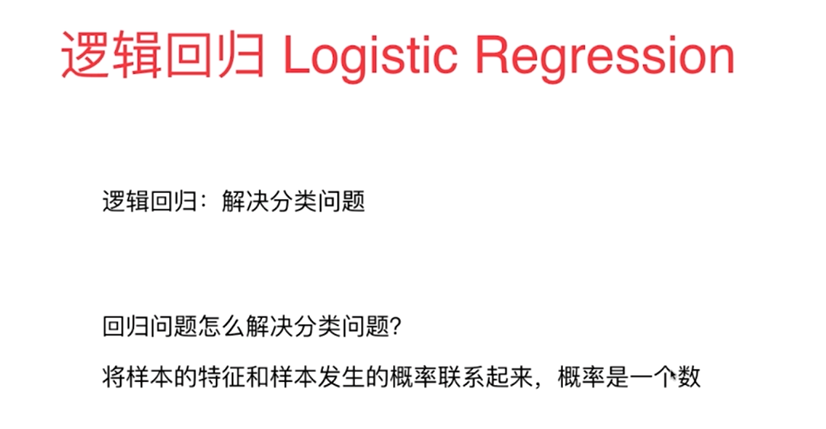

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmod(t):
    return 1/(1+np.exp(-t))

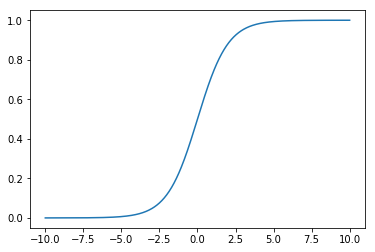

In [3]:
x = np.linspace(-10,10,500)
y = sigmod(x)
plt.plot(x,y)

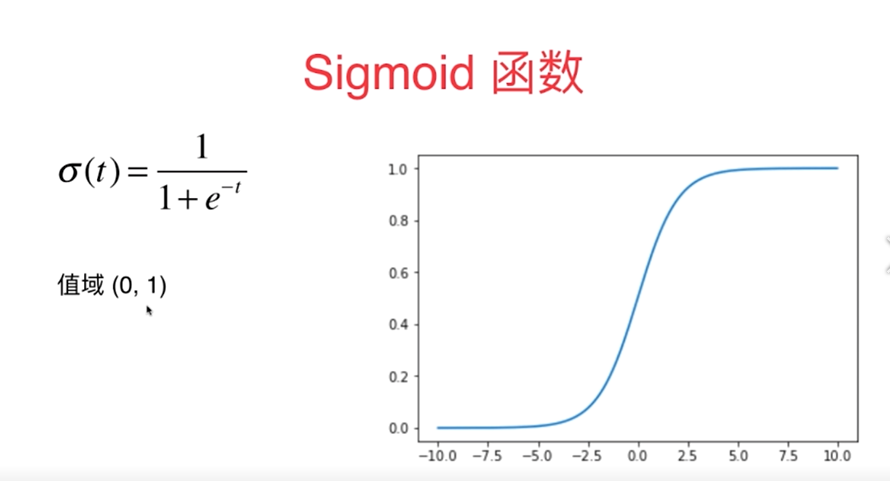

###  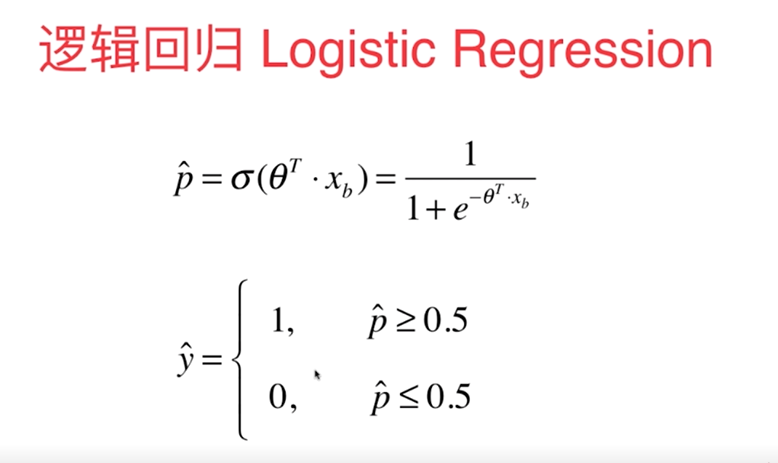

# 2. 逻辑回归的损失函数

### 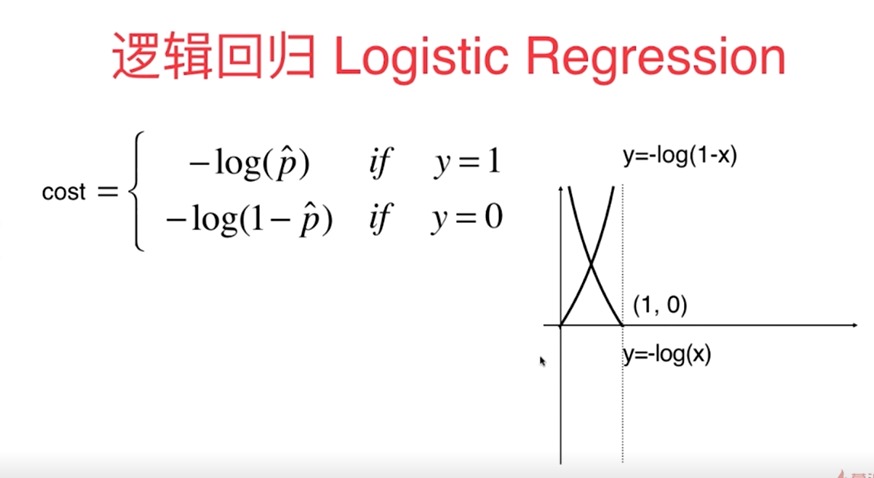

### 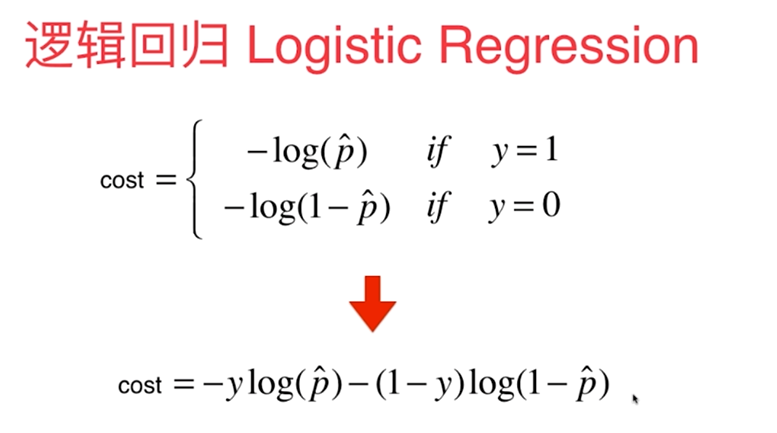

### 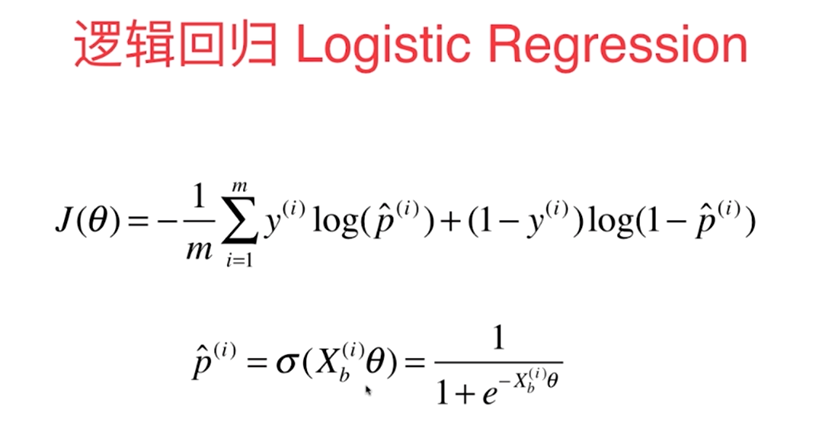

# 3.逻辑回归损失函数的梯度

 ### 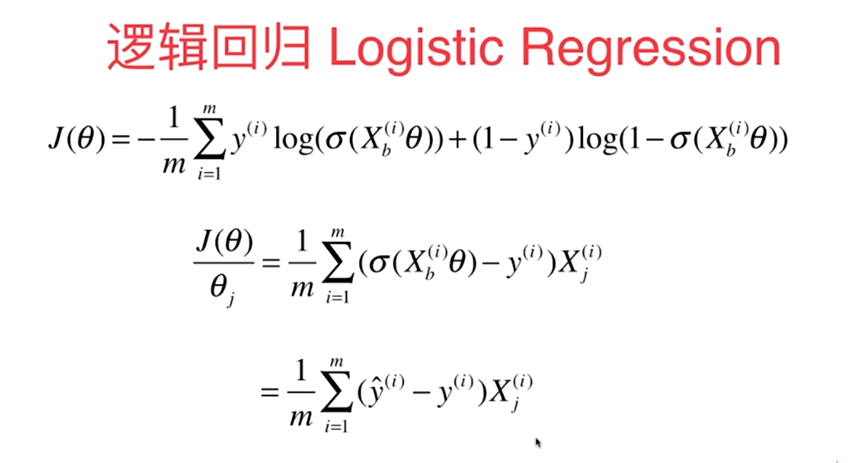

### 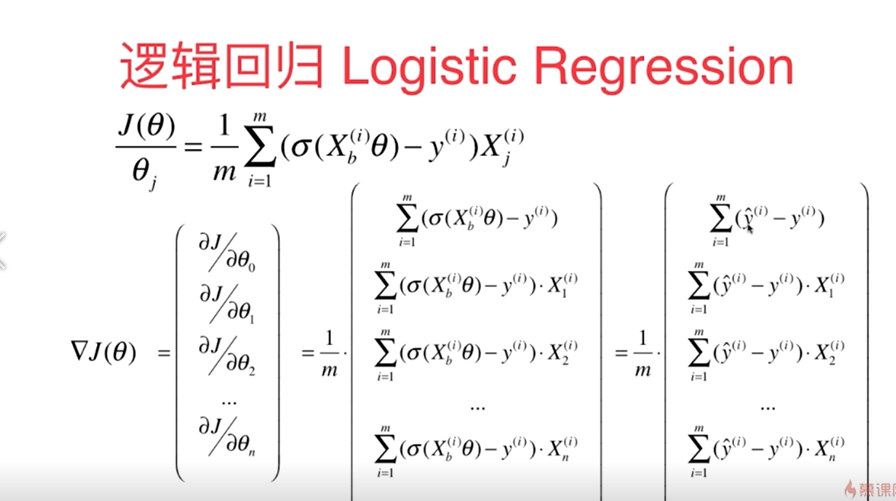

# 4 . 实现逻辑回归算法

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data
y = iris.target

In [7]:
x = X[y<2,:2]
y = y[y<2]

In [8]:
print(x.shape,y.shape)

(100, 2) (100,)


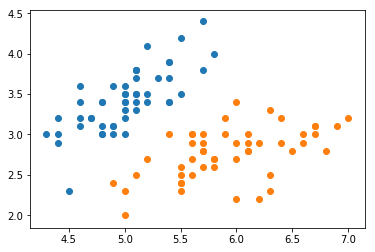

In [9]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [10]:
from playML.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,seed = 666)

In [11]:
from playML.LogisticRegression import LogisticRegression

In [12]:
log_reg = LogisticRegression()

In [13]:
log_reg.fit(x_train,y_train)

 LogisticRegression()

In [14]:
log_reg.score(x_test,y_test)

1.0

# 5 决策边界

### 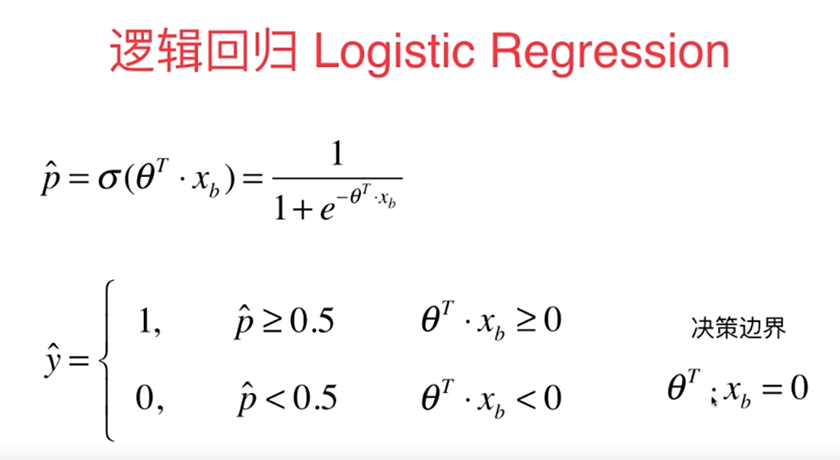

### 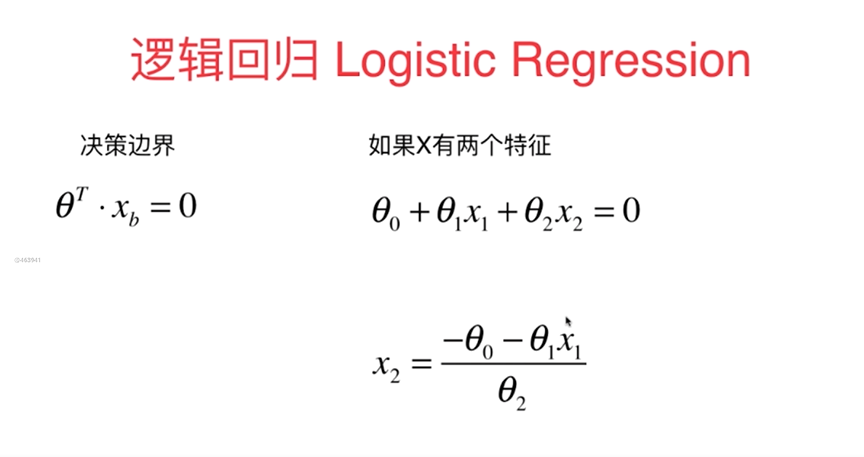

In [15]:
def x2(x1):
    return (-log_reg.coef_[0]*x1 - log_reg.interception_)/log_reg.coef_[1]

In [16]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

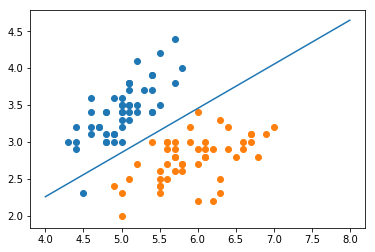

In [17]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.plot(x1_plot,x2_plot)


In [18]:

def plot_decison_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    cusom_cmp = ListedColormap(['r','g','b'])
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = cusom_cmp)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[4, 7.5, 1.5, 4.5]

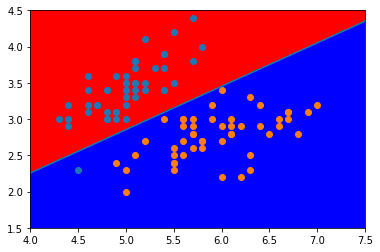

In [19]:
plot_decison_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.plot(x1_plot,x2_plot)
plt.axis([4,7.5,1.5,4.5])

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [51]:
knn_clf.score(x_test,y_test)

1.0

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[4, 7.5, 1.5, 4.5]

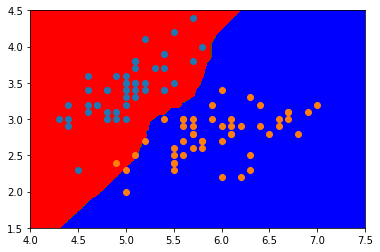

In [52]:
plot_decison_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.axis([4,7.5,1.5,4.5])

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors= 50)
x = iris.data[:,:2]
y = iris.target
knn_clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[4, 7.5, 1.5, 4.5]

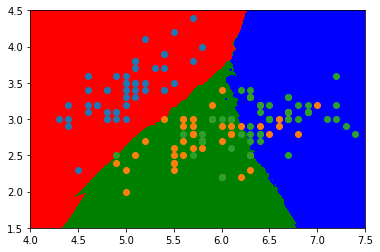

In [54]:
plot_decison_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.scatter(x[y==3,0],x[y==3,1])
plt.axis([4,7.5,1.5,4.5])

# 6 在逻辑回归中使用多项式特征

### 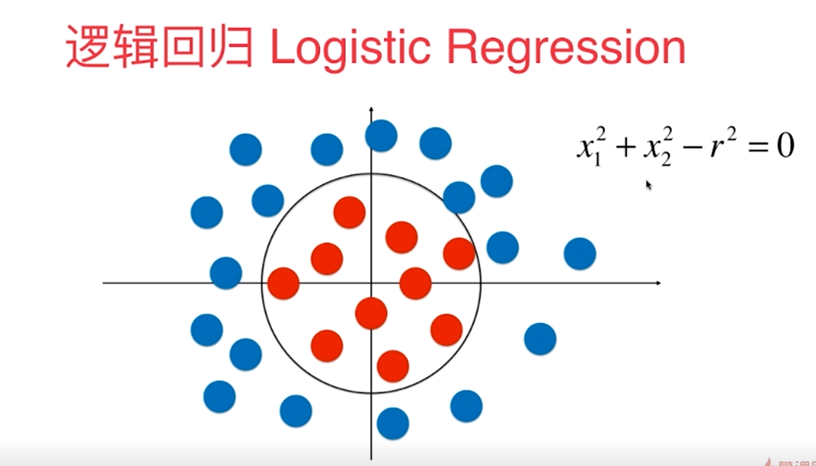

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
np.random.seed(666)
X = np.random.normal(0,1,size =(200,2))
y = np.array(X[:,0]**2+X[:,1]**2<1.5,dtype = 'int')

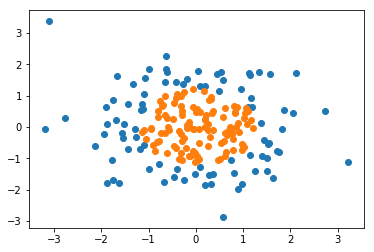

In [72]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [73]:
from playML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg.score(X,y)

0.605

[-4, 4, -4, 4]

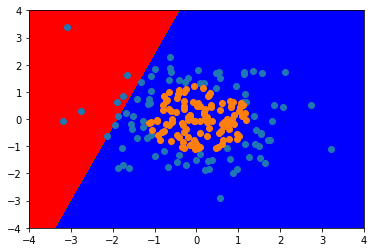

In [74]:
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [81]:
def PolynormalLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [84]:
poly_log_reg = PolynormalLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg',  LogisticRegression())])

In [85]:
poly_log_reg.score(X,y)

0.95

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[-4, 4, -4, 4]

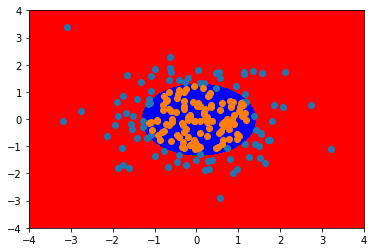

In [86]:
plot_decison_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

# 7 scikit-learn中的逻辑回归

### 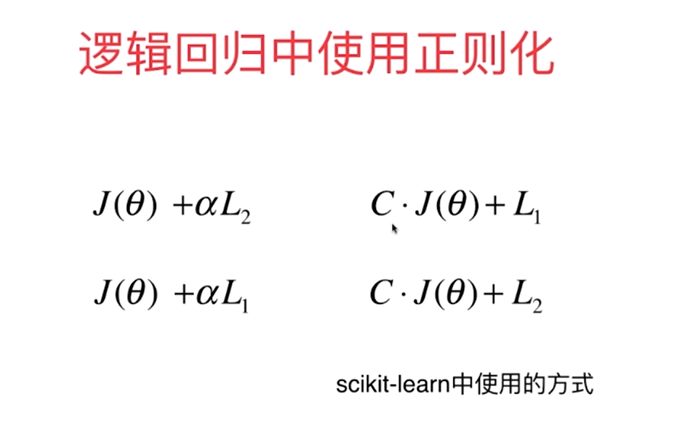

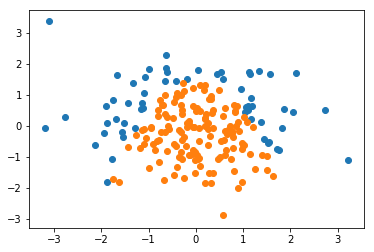

In [92]:
np.random.seed(666)
X = np.random.normal(0,1,size =(200,2))
y = np.array(X[:,0]**2+X[:,1]<1.5,dtype = 'int')
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [94]:
from playML.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)

### scikit - learn 中的逻辑回归

In [97]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
log_reg.score(x_train,y_train)

0.7625

In [100]:
log_reg.score(x_test,y_test)

0.825

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[-4, 4, -4, 4]

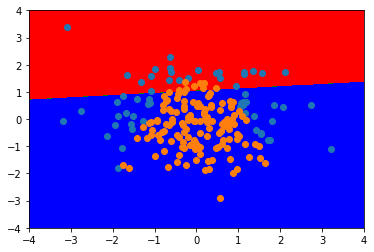

In [99]:
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

In [103]:
def PolynormalLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [105]:
log_reg = PolynormalLogisticRegression(degree=2)

In [107]:
log_reg.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[-4, 4, -4, 4]

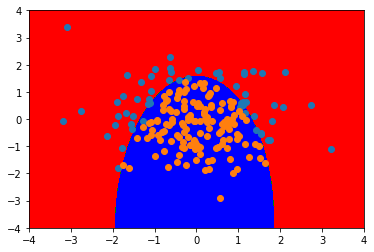

In [108]:
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[-4, 4, -4, 4]

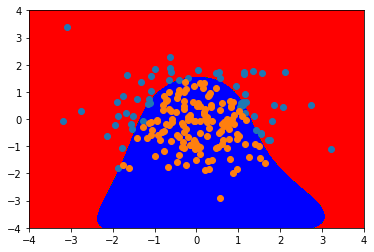

In [110]:
log_reg = PolynormalLogisticRegression(degree=20)
log_reg.fit(x_train,y_train)
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

In [111]:
def PolynormalLogisticRegression(degree,C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C = C))
    ])

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


[-4, 4, -4, 4]

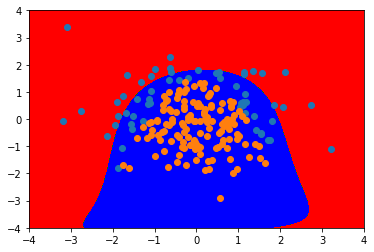

In [113]:
log_reg = PolynormalLogisticRegression(degree=20,C = 0.01)
log_reg.fit(x_train,y_train)
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis([-4,4,-4,4])

In [117]:
def PolynormalLogisticRegression(degree,C,penalty = 'l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C = C,penalty = penalty))
    ])

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


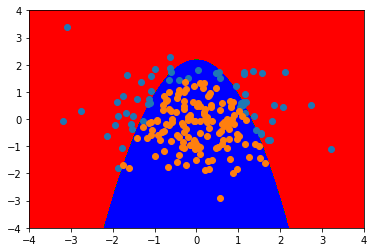

In [119]:
log_reg = PolynormalLogisticRegression(degree=20,C = 0.1,penalty = 'l1')
log_reg.fit(x_train,y_train)
plot_decison_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
# plt.axis([-4,4,-4,4]

# 8 OvR与OvO

### 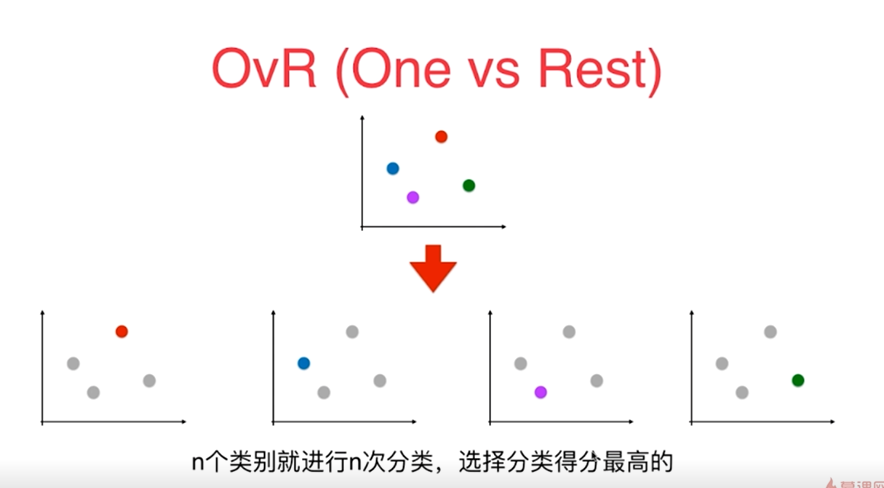

In [122]:
from playML.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [125]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [126]:
log_reg.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
log_reg.score(x_test,y_test)

0.7

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


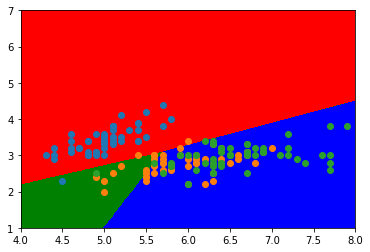

In [130]:
plot_decison_boundary(log_reg,axis=[4,8,1,7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
# plt.axis([-4,4,-4,4])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


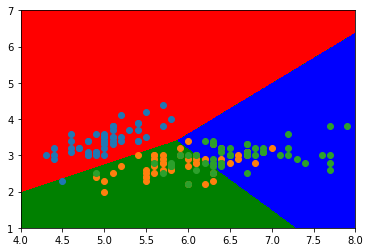

In [132]:
log_reg = LogisticRegression(multi_class='multinomial',solver = 'newton-cg')
log_reg.fit(x_train,y_train)
plot_decison_boundary(log_reg,axis=[4,8,1,7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
# plt.axis([-4,4,-4,4])

In [133]:
from playML.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9333333333333333

In [134]:
from playML.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)
log_reg = LogisticRegression(multi_class='multinomial',solver = 'newton-cg')
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

1.0

# OVO and OVR

In [135]:
from sklearn.multiclass import OneVsOneClassifier
over = OneVsOneClassifier(log_reg)
over.fit(x_train,y_train)
over.score(x_test,y_test)

1.0

In [136]:
from sklearn.multiclass import OneVsRestClassifier
over = OneVsRestClassifier(log_reg)
over.fit(x_train,y_train)
over.score(x_test,y_test)

0.9666666666666667